# Imports and setup

In [50]:
from KDEpy import KDE

In [51]:
from scipy.stats import norm, lognorm
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
np.random.seed(123)

# Synthetic data sets

In [53]:
# Data from https://projecteuclid.org/download/pdfview_1/euclid.aos/1281964340
N = norm
datasets = [[(0.5, N(loc=0, scale=(1/10))), (0.5, N(loc=5, scale=1))],
            [(0.5, N(loc=0, scale=1))] + [(1/10, N(loc=(k/2 - 1), scale=1/10)) for k in range(5)],
            [(1/8, N(loc=3*((2/3)**k - 1), scale=(2/3)**(k))) for k in range(8)],
            [(49/100, N(loc=-1, scale=(2/3))), (49/100, N(loc=1, scale=(2/3)))]
            + [(1/350, N(loc=(k-3)/2, scale=(1/100))) for k in range(7)],
            [(2/7, N(loc=(12*k - 15)/7, scale=(2/7))) for k in range(3)] +
            [(1/21, N(loc=(2*k)/7, scale=(1/21))) for k in range(8, 11)],
            [(46/100, N(loc=(2*k - 1), scale=(2/3))) for k in range(2)] +
            [(1/300, N(loc=-(k/2), scale=(1/100))) for k in range(1, 4)] +
            [(7/300, N(loc=(k/2), scale=(7/100))) for k in range(1, 4)],
            [(0.5, N(loc=-2, scale=(1/2))), (0.5, N(loc=2, scale=0.5))],
            [(3/4, N(loc=0, scale=1)), (1/4, N(loc=3/2, scale=1/3))],
            [(1, lognorm(loc=0, scale=1, s=1))],
            [(0.5, N(loc=0, scale=1))] +
            [(2**(1-k)/31, N(loc=(k + 0.5), scale=(2**(-k)/10))) for k in range(-2, 3)]]

# The sum of the fractions equal 1 in every dataset
assert np.all([np.allclose(sum([frac for (frac, d) in data]), 1) for data in datasets])

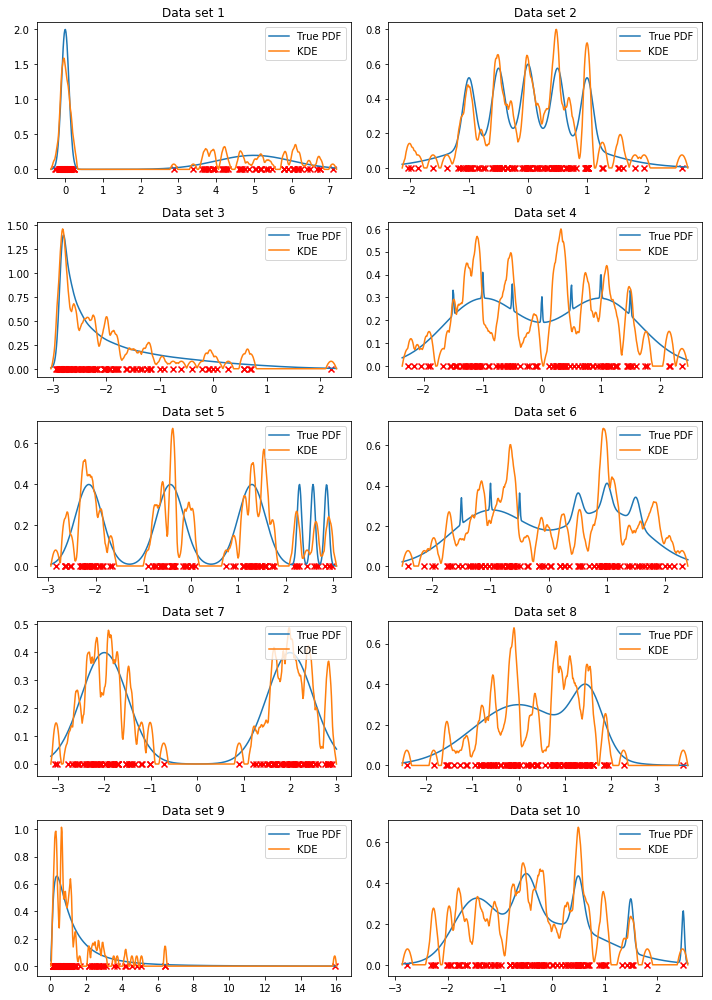

In [54]:
# Number of points
n = 100

plt.figure(figsize = (10, 14))
for i, data in enumerate(datasets, 1):
    
    # Sample the PDFs, then get x and y for true values
    samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
    x = np.linspace(np.min(samples)-0.1, np.max(samples)+0.1, num=2**9)
    y_true = reduce(np.add, (frac * d.pdf(x) for frac, d in data))
    y_kde = KDE('epa', bw = 0.2).fit(samples).evaluate_sorted(x)
    
    plt.subplot(5, 2, i)
    plt.title(f'Data set {i}')
    plt.scatter(samples, np.zeros_like(samples), marker='x', color='red')
    plt.plot(x, y_true, label='True PDF')
    plt.plot(x, y_kde, label='KDE')
    plt.legend(loc='upper right')
    plt.tight_layout()
      
plt.show()

-------------

# Cross validation

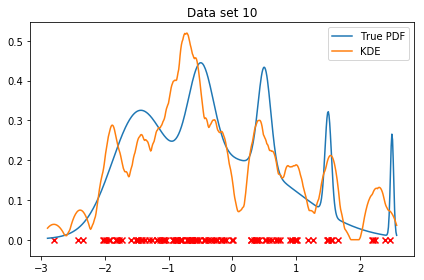

In [94]:
data = datasets[-1]
np.random.seed(123)
n = 100

# Sample the PDFs, then get x and y for true values
samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
x = np.linspace(np.min(samples)-0.1, np.max(samples)+0.1, num=2**9)
y_true = reduce(np.add, (frac * d.pdf(x) for frac, d in data))
kde = KDE('epa', bw = 0.4).fit(samples)
y_kde = kde.evaluate_sorted(x)


plt.title(f'Data set {i}')
plt.scatter(samples, np.zeros_like(samples), marker='x', color='red')
plt.plot(x, y_true, label='True PDF')
plt.plot(x, y_kde, label='KDE')
plt.legend(loc='upper right')
plt.tight_layout()

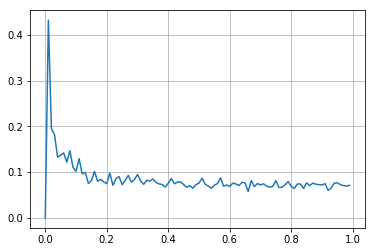

In [91]:
good, bws = [], []
for bw in range(100):
    bw = (bw + 0.000000001) / 100
    kde = KDE('epa', bw = bw).fit(samples)
    more_samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
    goodness = kde.evaluate_sorted(more_samples)**2

    #print(bw, np.mean(goodness))
    
    good.append(np.mean(goodness))
    bws.append(bw)
    
    
    
    
plt.plot(bws, good)
plt.grid(True)

In [ ]:
errors = 

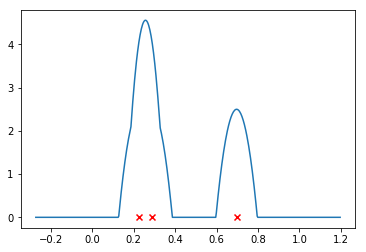

In [42]:
np.random.seed(123)
data = np.random.random(3)

x = np.linspace(data.min()-0.5, data.max()+0.5, num=500)
y_kde = KDE('epa', bw = 0.2).fit(data).evaluate_sorted(x)

plt.scatter(data, np.zeros_like(data), marker='x', color='red')
plt.plot(x, y_kde, label='KDE')

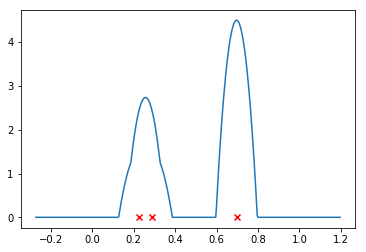

In [49]:
y_kde = KDE('epa', bw = 0.2).fit(data).evaluate_sorted(x, weights=[3, 1, 1])
plt.scatter(data, np.zeros_like(data), marker='x', color='red')
plt.plot(x, y_kde, label='KDE')

In [28]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [ ]:
from KDEpy import KDE
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

In [ ]:
import KDEpy


np.random.seed(123)
data = np.random.rand(5)

kde = KDE(kernel = 'gaussian', bw = 1)
kde.fit(data)
x = np.linspace(-1, 2, num=500)
y = kde.evaluate_sorted(x)

plt.plot(x, y)
plt.scatter(data, np.zeros_like(data) + 0.1, marker='x', color='red')
plt.show()

In [ ]:
data = np.random.rand(5)

kde = KDEpy.KDE(kernel = 'gaussian', bw = 1)
kde.fit(data)
x = np.linspace(-1, 2, num=500)
y = kde.evaluate_sorted(x)

plt.plot(x, y)
plt.scatter(data, np.zeros_like(data) + 0.1, marker='x', color='red')
plt.show()

In [ ]:
y

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(123)
n = 2**16
print(n)
data = np.concatenate([np.random.randn(n), np.random.randn(n) + 5])*15


#data = np.array([0, 0.1, 0.2, 0.3, 0.4, 2, 3, 4])

kde = KDEpy.KDE(kernel = 'gaussian', bw = 0.6)
kde.fit(data)

x = np.linspace(np.min(data)-1, np.max(data)+1, num = 2**10)
#weights = np.array([1, 2, 3, 4, 3, 2, 1, 0])
weights = None #np.arange(len(data))  + 1
#x = np.linspace(-2, 2+5, num = 5+5)

y = kde.evaluate_sorted(x, weights = weights)



In [ ]:
plt.plot(x, y)
plt.show()

In [ ]:
kde = KDEpy.KDE('box', bw = 2)
kde.fit(np.array([0, 0, 0,0.5, 1, 2, 3, 1]))
x = np.linspace(-1,10, num=500)#np.array([0])
y = kde.evaluate_naive(x)
#assert np.allclose(y, np.array([1.]))

plt.plot(x, y)
plt.show()

In [ ]:
kde = KDEpy.KDE('box', bw = 2)
kde.fit(np.log(np.array([0, 0, 0,0.5, 1, 2, 3, 1]) + 0.0001))
x = np.linspace(0,10, num=500)#np.array([0])
y = np.exp(kde.evaluate_naive(np.log(x + 0.0001)))
#assert np.allclose(y, np.array([1.]))

plt.plot(x, y)
plt.show()